In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import learning_curve
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values



In [3]:
loo = LeaveOneOut()
loo_scores = [] 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1265
[LightGBM] [Info] Number of data points in the train set: 2125, number of used features: 20
[LightGBM] [Info] Start training from score -0.250575
[LightGBM] [Info] Start training from score -1.974552
[LightGBM] [Info] Start training from score -2.491043
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Leave-One-Out CV Accuracy: 99.90592662276576 %
Precision (macro) = 0.9995976664654999
Recall (macro) = 0.9977401129943503
F1-score (macro) = 0.998664924907161
*******************


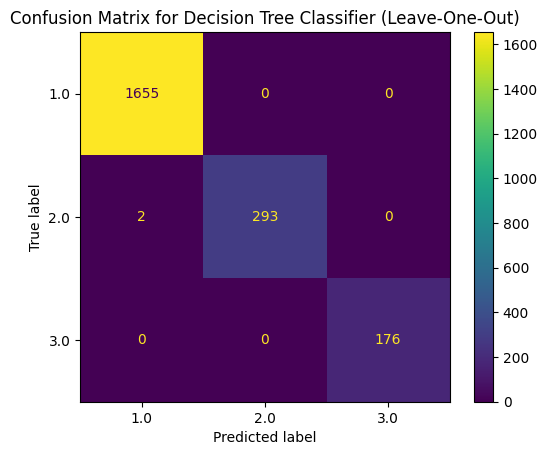

Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1655
         2.0       1.00      0.99      1.00       295
         3.0       1.00      1.00      1.00       176

    accuracy                           1.00      2126
   macro avg       1.00      1.00      1.00      2126
weighted avg       1.00      1.00      1.00      2126



In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

lgb_classifier = lgb.LGBMClassifier()

lgb_classifier.fit(X_train, y_train)
y_pred = lgb_classifier.predict(X_test)

loo_scores.append(y_pred[0] == y_test[0])


# Print accuracy
accuracy = accuracy_score(y, lgb_classifier.predict(X))

precision = precision_score(y, lgb_classifier.predict(X), average='macro')
recall = recall_score(y, lgb_classifier.predict(X), average='macro')
f1 = f1_score(y, lgb_classifier.predict(X), average='macro')
print("Leave-One-Out CV Accuracy:", accuracy * 100, "%")

print("Precision (macro) =", precision)
print("Recall (macro) =", recall)
print("F1-score (macro) =", f1)

print("*******************")

conf_matrix = confusion_matrix(y, lgb_classifier.predict(X))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for Decision Tree Classifier (Leave-One-Out)')
plt.show()

class_report = classification_report(y, lgb_classifier.predict(X))
print("Classification Report:")
print(class_report)




In [5]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
df = pd.read_csv("fetal_health.csv")

# Separate features (X) and target variable (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set up the parameters for the LightGBM model
params = {
    "objective": "regression",  # or "classification" based on your task
    "metric": "mse",  # or other appropriate metric
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9
}

# Train the LightGBM model
num_round = 100
bst = lgb.train(params, train_data, num_round)

# Calculate feature importance
feature_importance = bst.feature_importance(importance_type='split')  # or 'gain' for gain-based importance

# Map feature names to their indices
feature_names = X.columns
feature_indices = dict(zip(range(len(feature_names)), feature_names))

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]

# Print feature importance
print("Feature importance:")
for idx in sorted_idx:
    print(f"{feature_indices[idx]}: {feature_importance[idx]}")

# Plot feature importance
sns.barplot(x=feature_importance[sorted_idx], y=[feature_indices[idx] for idx in sorted_idx], palette="viridis")
plt.title("Feature Importance")
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(lgb_classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()